# Generate calibration curves

To generate calibration curves:
- Prepare different calibration samples with a range of substrate concentrations (e.g. 0.5, 1, 2, 5, and 10 mM of glucose). If substrates show up at different retention times, different substrates can be mixed into one sample. 
- Run HPLC to analyze samples
- Run this script, step by step, to analyze the HPLC runs and gerate calibration curves. 
- Calibration curve coordinates (slope and offset) are copied to "data/calibration.json" so that they can be easily used when running data. 


In [1]:
#!pip install cremerlab-utils #you can use pip to install the required scripts
import sys, os
import glob 
import cremerlab.hplc #submodule to analyze hplc data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from scipy.integrate import odeint #this is the module to solve ODEs
%matplotlib inline
import scipy.stats 
import json


# Zurich calibration runs

Processing files...: 100%|██████████████████████| 10/10 [00:00<00:00, 21.32it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...: 100%|██████████████████████| 10/10 [00:02<00:00,  4.84it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1306: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
/Users/jonascremer/Library

******Calibration curve*****
Calibration for substrate glucose
[14.8, 15.5]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
1,14.878212,15.000000,0.212061,1.646490,8.820323,4.688518,2,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
1,14.859367,15.000000,0.252760,1.807081,52.169983,33.053608,2,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
1,14.890756,15.000000,0.208721,1.914013,1.305441,0.682988,2,STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...
1,14.881612,15.000000,0.217207,1.606412,14.139483,7.698349,2,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
0,14.902622,15.000000,0.190938,1.890333,0.233646,0.111701,1,STD_02.1_Glu_Malt_FP_09_92_RI_1_mMhis0.5_chrom...
1,14.863532,14.983333,0.236105,1.738615,26.223704,15.519911,2,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
1,14.858105,14.983333,0.240808,1.766959,30.663582,18.509028,2,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
1,14.868424,15.000000,0.229924,1.700871,21.295834,12.273104,2,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
1,14.857465,14.983333,0.246220,1.787644,37.280453,23.008783,2,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
1,14.878218,15.000000,0.222581,1.918121,2.763309,1.541729,2,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 0.6195850577868284
Intercept: 0.20541991972136042
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


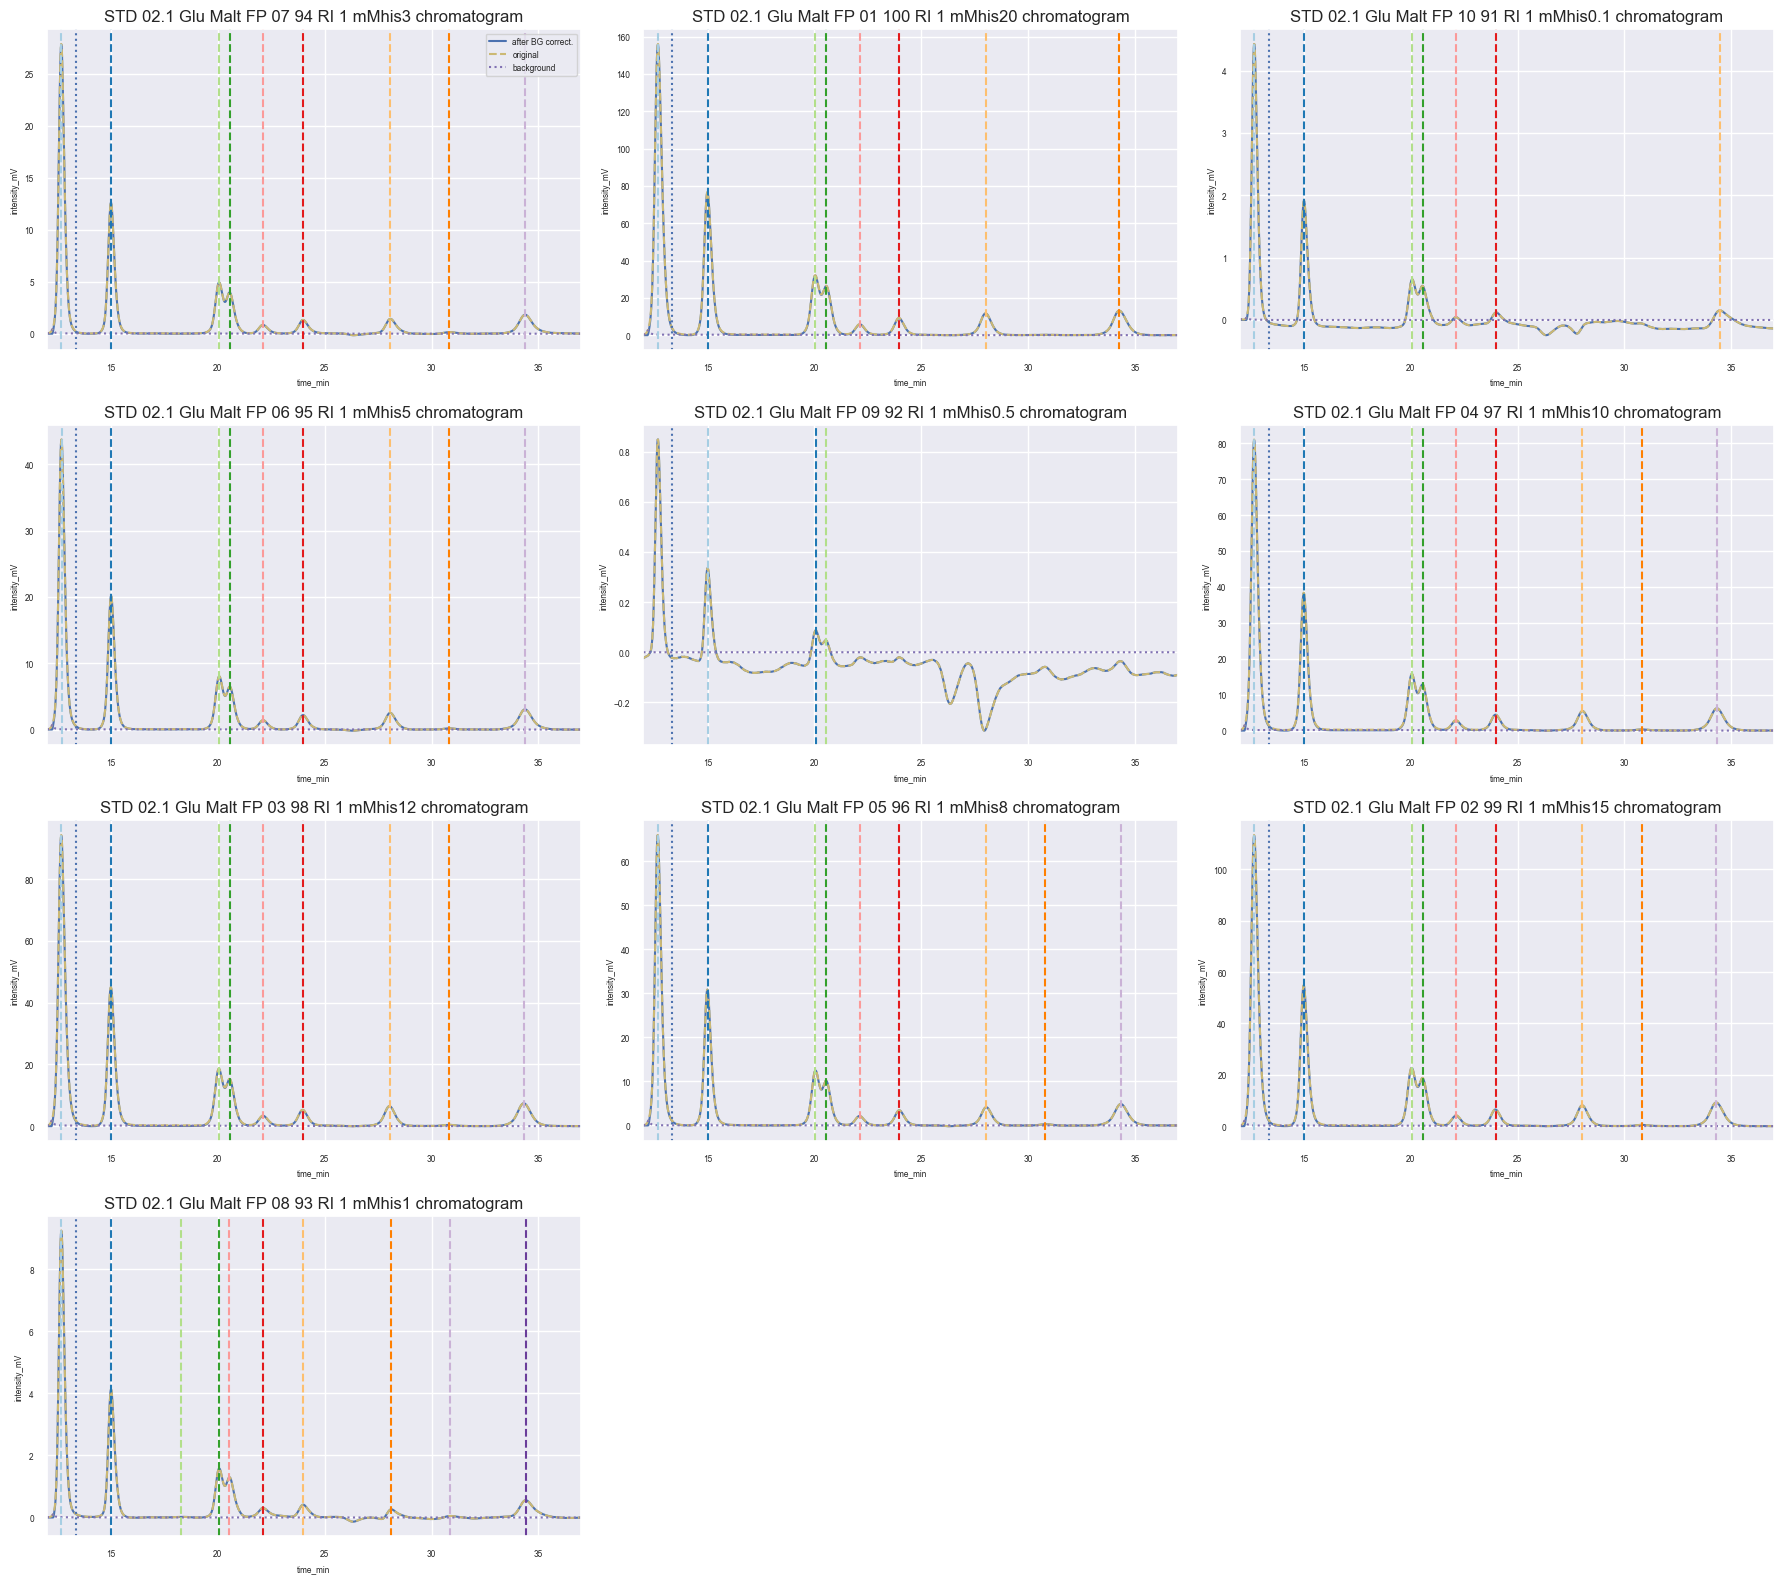

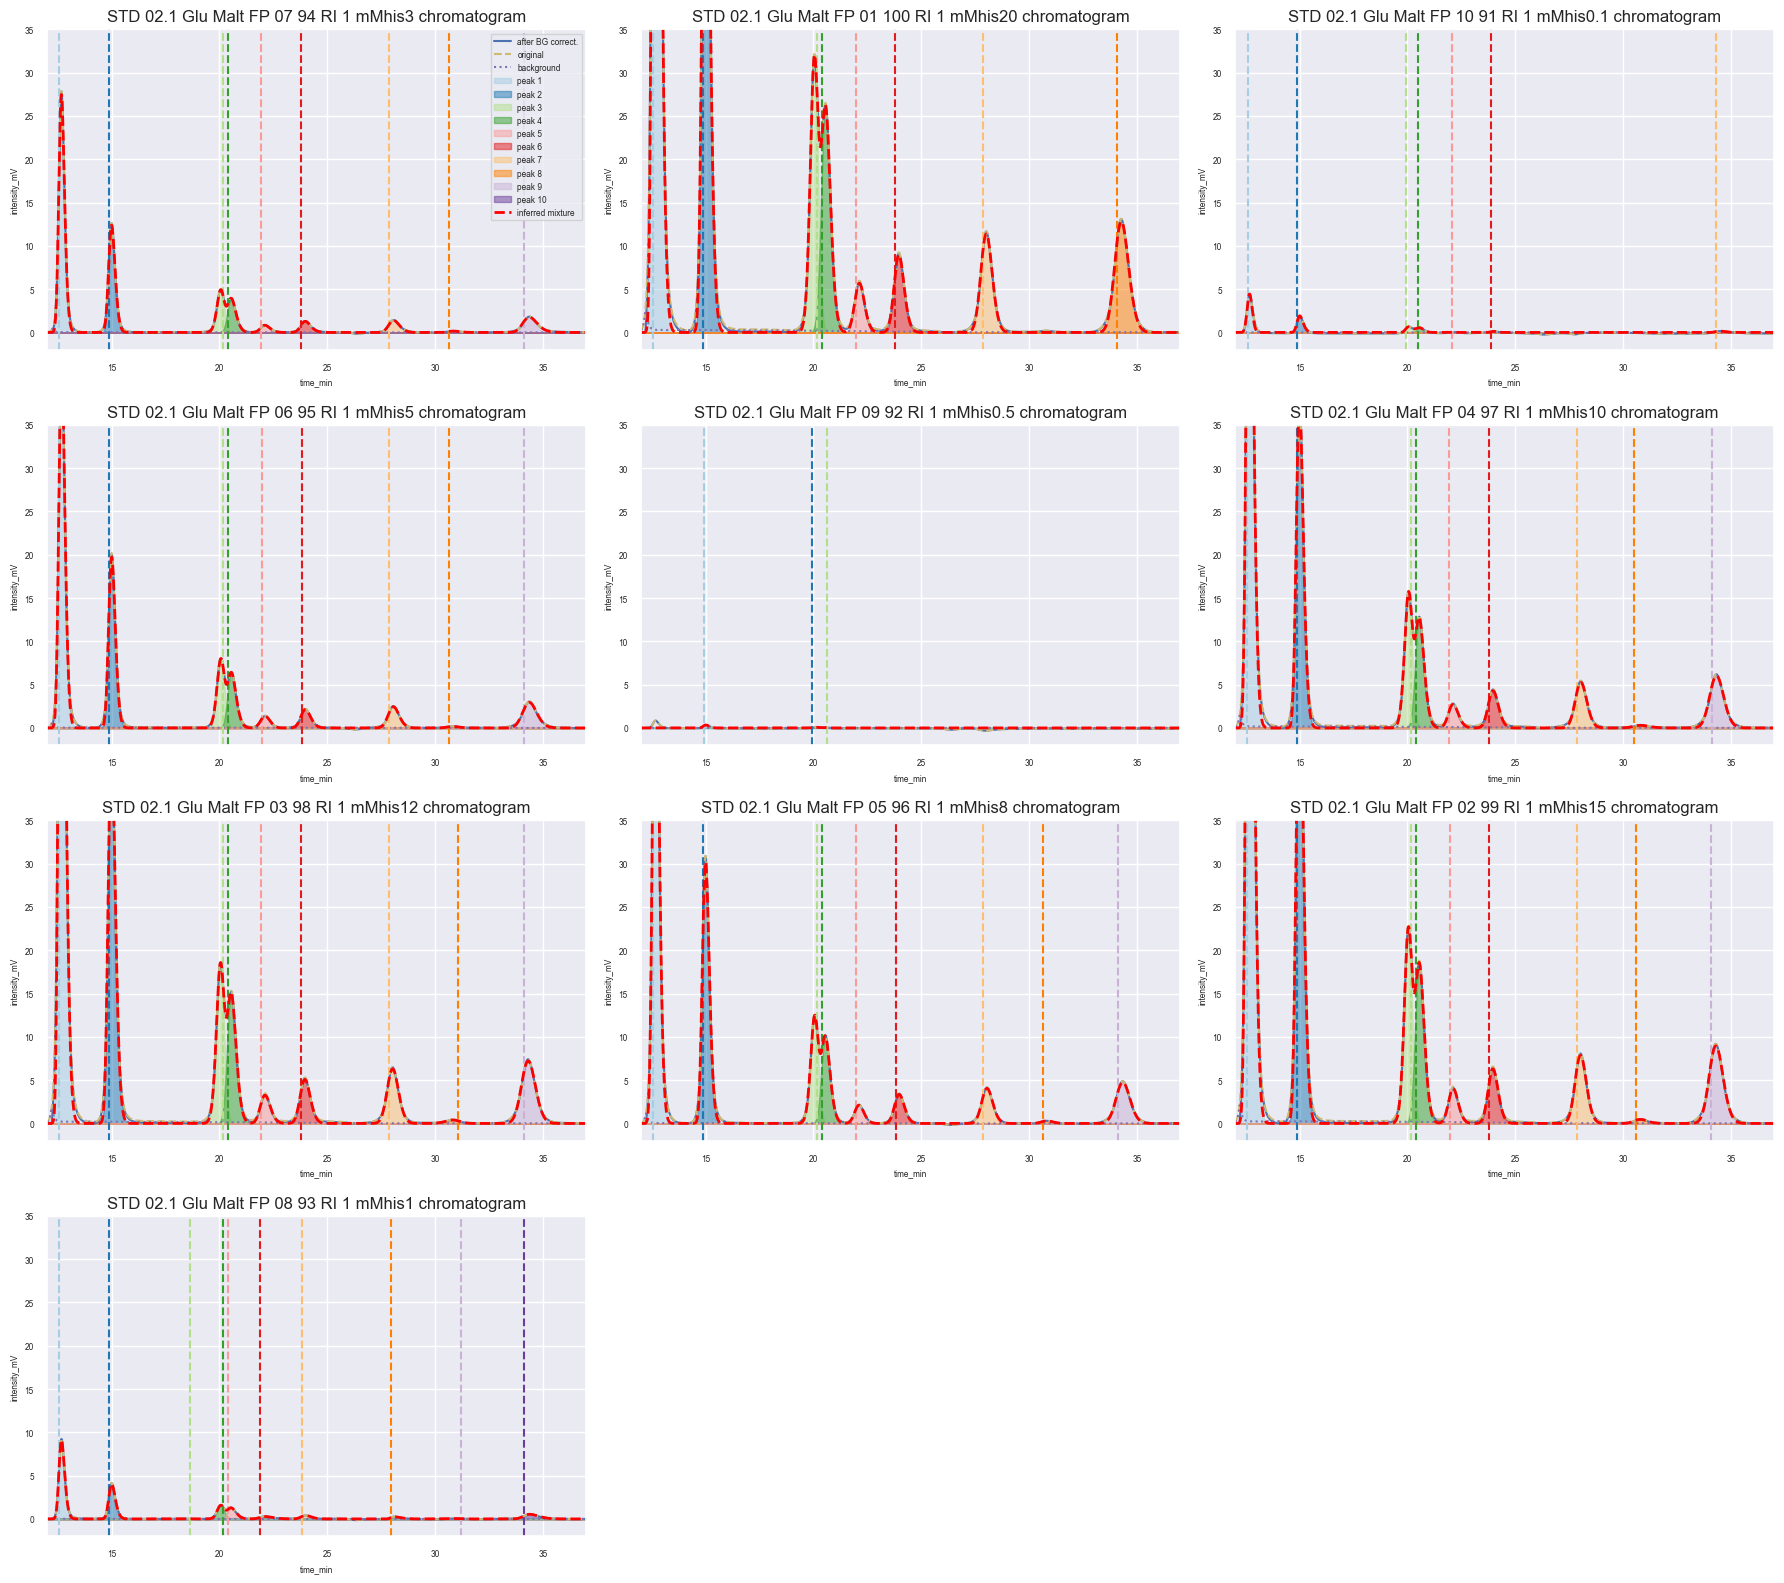

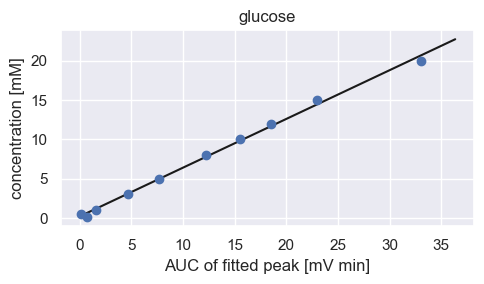

******Calibration curve*****
Calibration for substrate propionate
[27.5, 28]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
6,27.881851,28.066667,0.353364,1.660821,0.992285,0.843964,7,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
6,27.842604,28.016667,0.332505,1.106512,9.078552,7.566658,7,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
6,27.884900,28.066667,0.333872,1.294682,1.871020,1.565843,7,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
6,27.866462,28.033333,0.333428,1.070512,4.228938,3.534463,7,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
6,27.861759,28.033333,0.327789,1.048586,5.091098,4.183072,7,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
6,27.876419,28.050000,0.324547,1.147392,3.197332,2.601091,7,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
6,27.852038,28.016667,0.331709,1.102345,6.274616,5.217162,7,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
7,27.937103,28.116667,0.395549,4.355894,0.147656,0.137310,8,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 2.58876976743814
Intercept: 0.9498979908269689
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


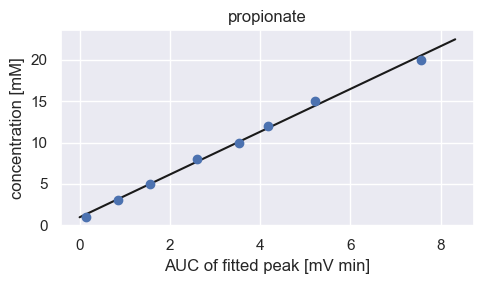

******Calibration curve*****
Calibration for substrate succinate
[19.5, 20.2]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
2,20.169240,20.050000,0.213771,-1.106961,3.909117,2.094679,3,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
2,20.152776,20.033333,0.225005,-1.050885,25.323953,14.282799,3,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
2,19.917853,20.066667,0.283664,2.809172,0.401643,0.285585,3,STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...
2,20.177850,20.066667,0.218822,-1.122070,6.307584,3.459747,3,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
1,19.945797,20.066667,0.225051,3.388475,0.052665,0.029710,2,STD_02.1_Glu_Malt_FP_09_92_RI_1_mMhis0.5_chrom...
2,20.172089,20.050000,0.230327,-1.223762,12.026972,6.943702,3,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
2,20.165864,20.050000,0.230172,-1.198572,14.252379,8.222979,3,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
2,20.174185,20.050000,0.226045,-1.194932,9.629092,5.455940,3,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
2,20.159887,20.050000,0.227858,-1.129581,17.684213,10.100411,3,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
3,20.143305,20.066667,0.189358,-0.718663,1.387321,0.658494,4,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 1.423080577449393
Intercept: 0.1262902108989037
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


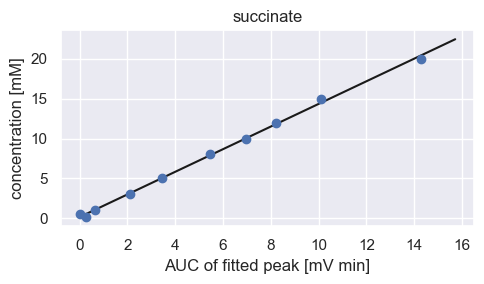

******Calibration curve*****
Calibration for substrate lactate
[20.2, 20.8]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
3,20.392552,20.550000,0.282992,1.787552,2.710490,1.922704,4,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
3,20.398066,20.550000,0.292434,1.427485,19.268747,14.124430,4,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
3,20.465668,20.550000,0.221160,1.258242,0.374990,0.207881,4,STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...
3,20.400423,20.550000,0.283070,1.740919,4.436769,3.148110,4,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
2,20.644305,20.533333,0.167026,-2.289098,0.030008,0.012563,3,STD_02.1_Glu_Malt_FP_09_92_RI_1_mMhis0.5_chrom...
3,20.388468,20.550000,0.291508,1.672849,8.948074,6.538370,4,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
3,20.386476,20.550000,0.291571,1.616572,10.707741,7.825869,4,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
3,20.393979,20.550000,0.284944,1.646894,7.119929,5.085392,4,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
3,20.390987,20.550000,0.290820,1.532531,13.337230,9.722528,4,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
4,20.383568,20.533333,0.300690,2.008444,0.848701,0.639681,5,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 1.448009000537077
Intercept: 0.33180975843543514
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


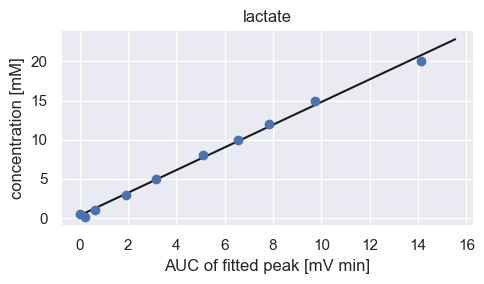

******Calibration curve*****
Calibration for substrate butyrate
[33.5, 35]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
8,34.110722,34.383333,0.480688,1.758163,1.229019,1.480852,9,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
7,34.055458,34.266667,0.419532,1.220968,9.948893,10.462353,8,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
6,34.292778,34.466667,0.346327,2.935317,0.099521,0.086396,7,STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...
8,34.137991,34.366667,0.432473,1.288853,2.249756,2.438846,9,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
8,34.123362,34.333333,0.403801,1.044374,4.872145,4.931482,9,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
8,34.110344,34.316667,0.402829,1.056694,5.827900,5.884681,9,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
8,34.145470,34.350000,0.396219,1.004817,3.876980,3.850515,9,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
8,34.090184,34.300000,0.408047,1.102847,7.146779,7.309889,9,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
9,34.122359,34.400000,0.542753,2.371159,0.344955,0.469304,10,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 1.9525106522023759
Intercept: 0.22493346233073908
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


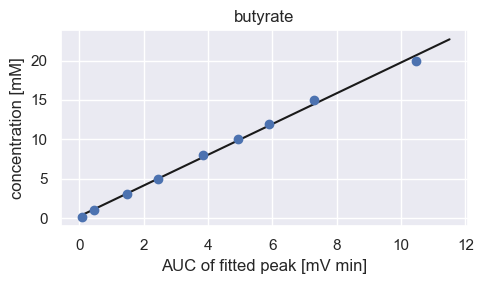

******Calibration curve*****
Calibration for substrate acetate
[23.7, 24.2]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
5,23.794338,23.983333,0.338825,1.830036,0.884155,0.750902,6,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
5,23.797122,23.966667,0.302371,1.265900,6.884381,5.204431,6,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
5,23.888578,24.000000,0.206180,1.824913,0.088384,0.045678,6,STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...
5,23.810463,23.983333,0.315264,1.501052,1.555053,1.228850,6,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
5,23.798954,23.966667,0.312535,1.303183,3.271233,2.556164,6,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
5,23.794211,23.966667,0.311615,1.316082,3.865632,3.012335,6,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
5,23.808247,23.966667,0.303994,1.366490,2.520634,1.920714,6,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
5,23.797473,23.966667,0.304561,1.252987,4.861998,3.706828,6,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
6,23.808143,24.000000,0.345152,1.944909,0.272883,0.236007,7,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 3.8945994889330273
Intercept: 0.15770385377927987
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


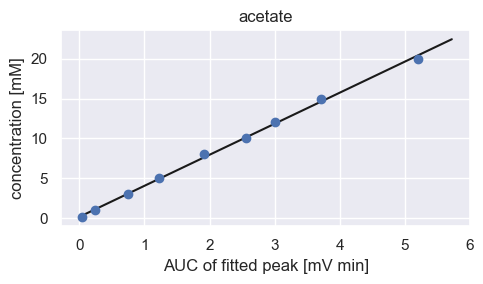

******Calibration curve*****
Calibration for substrate formate
[21.0, 22.5]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
4,21.937140,22.100000,0.311510,1.687603,0.587353,0.458629,5,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
4,21.972848,22.133333,0.292641,1.194554,4.436505,3.254360,5,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
4,22.075064,22.116667,0.093575,0.740496,0.042643,0.010002,5,STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...
4,21.972563,22.116667,0.275130,1.135254,1.079658,0.744585,5,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
4,21.942355,22.116667,0.313474,1.444751,2.011768,1.580774,5,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
4,21.942140,22.116667,0.312653,1.420284,2.419463,1.896143,5,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
4,21.965668,22.116667,0.278924,1.221528,1.634723,1.142931,5,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
4,21.960954,22.116667,0.293908,1.223514,3.104871,2.287413,5,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
5,21.857649,22.116667,0.499608,2.947674,0.170327,0.213307,6,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 6.255337440640138
Intercept: 0.17913768340117642
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


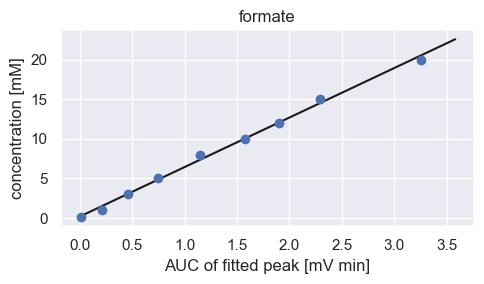

******Calibration curve*****
Calibration for substrate maltose
[12.5, 13]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
0,12.565231,12.666667,0.189170,1.706511,19.342119,9.149319,1,STD_02.1_Glu_Malt_FP_07_94_RI_1_mMhis3_chromat...
0,12.544826,12.683333,0.255804,2.425717,99.302741,57.576912,1,STD_02.1_Glu_Malt_FP_01_100_RI_1_mMhis20_chrom...
0,12.594715,12.666667,0.150145,1.158557,3.495998,0.774650,1,STD_02.1_Glu_Malt_FP_10_91_RI_1_mMhis0.1_chrom...
0,12.566136,12.683333,0.200558,1.794055,29.884456,14.962530,1,STD_02.1_Glu_Malt_FP_06_95_RI_1_mMhis5_chromat...
0,12.548953,12.666667,0.225419,1.961835,53.647218,30.312861,1,STD_02.1_Glu_Malt_FP_04_97_RI_1_mMhis10_chroma...
0,12.542508,12.666667,0.236976,2.485992,59.473073,31.997062,1,STD_02.1_Glu_Malt_FP_03_98_RI_1_mMhis12_chroma...
0,12.553804,12.666667,0.216111,1.887903,44.241541,23.966038,1,STD_02.1_Glu_Malt_FP_05_96_RI_1_mMhis8_chromat...
0,12.542805,12.666667,0.241208,2.048236,74.356806,44.957529,1,STD_02.1_Glu_Malt_FP_02_99_RI_1_mMhis15_chroma...
0,12.565832,12.666667,0.194600,1.945061,6.189408,3.019133,1,STD_02.1_Glu_Malt_FP_08_93_RI_1_mMhis1_chromat...


Slope: 0.34746347638125014
Intercept: -0.13343406597518204
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


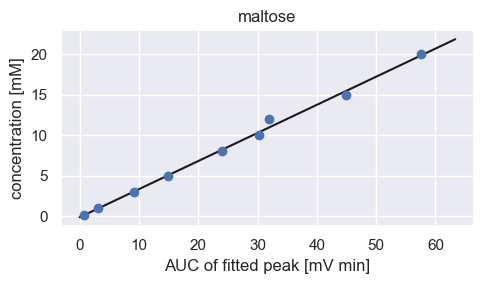

In [2]:
substratelist=["glucose","propionate","succinate","lactate","butyrate","acetate","formate","maltose"]
timewindows=[[14.8,15.5],[27.5,28],[19.5,20.2], [20.2,20.8],[33.5,35],[23.7,24.2],[21.0,22.5],[12.5,13]]
date=2308
runc="data_hplcrawdata/Zur_Newcalibration_June2023"
#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=None #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
plot_time_window=[12,37] #[12,25]
cremerlab.hplc.run_calibration(runc,substratelist,timewindows,analysis_window=analysis_window,date=date,list_samplenames=None, name_prefix="YCA_Zurich",filename_settings="hplc_settings_calibration_Zurich.csv",output_json='calibration.json',save_full_calibrationcurve='data_calibration',plot_time_window=plot_time_window, plot_upper_limit=35,plot_lower_limit=-2)

# Stanford calibration runs

Processing files...: 100%|████████████████████████| 5/5 [00:00<00:00, 31.14it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...: 100%|████████████████████████| 5/5 [00:17<00:00,  3.58s/it]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1306: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
/Users/jonascremer/Library

,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
0,18.698345,18.80000,0.187137,1.502515,24.495268,11.490313,1,230802_lactate_1mM_chromatogram
1,19.769485,19.72500,0.198587,-0.351015,55.518897,27.636452,2,230802_lactate_1mM_chromatogram
2,21.291202,21.38333,0.262575,0.419223,460.187788,302.885491,3,230802_lactate_1mM_chromatogram
0,14.848378,14.83333,0.305884,0.056875,1.967534,1.508584,1,230802_lactate_3mM_chromatogram
1,15.908489,15.61667,0.504278,0.255318,2.480482,3.135421,2,230802_lactate_3mM_chromatogram
2,16.649601,16.58333,0.097549,-0.599505,2.495713,0.610253,3,230802_lactate_3mM_chromatogram
3,17.352606,17.06667,0.283853,-0.429129,3.759290,2.674791,4,230802_lactate_3mM_chromatogram
4,17.922279,17.82500,0.189470,-1.675017,2.675385,1.270620,5,230802_lactate_3mM_chromatogram
5,18.814887,18.81667,0.260733,-0.001276,246.549206,161.135034,6,230802_lactate_3mM_chromatogram
6,19.434402,19.71667,0.531451,2.454256,195.979623,261.074138,7,230802_lactate_3mM_chromatogram


******Calibration curve*****
Calibration for substrate lactate
[21, 21.6]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
2,21.291202,21.38333,0.262575,0.419223,460.187788,302.885491,3,230802_lactate_1mM_chromatogram
7,21.216712,21.38333,0.326445,0.844821,1352.464983,1106.691245,8,230802_lactate_3mM_chromatogram
3,21.221728,21.38333,0.324135,0.834044,2209.353213,1795.069926,4,230802_lactate_5mM_chromatogram
2,21.207991,21.38333,0.336538,0.944903,4291.026752,3619.810386,3,230802_lactate_10mM_chromatogram
2,21.223653,21.39167,0.324388,0.845291,3502.454198,2847.912662,3,230802_lactate_8mM_chromatogram


Slope: 0.002747852891624338
Intercept: 0.08435018528349492
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


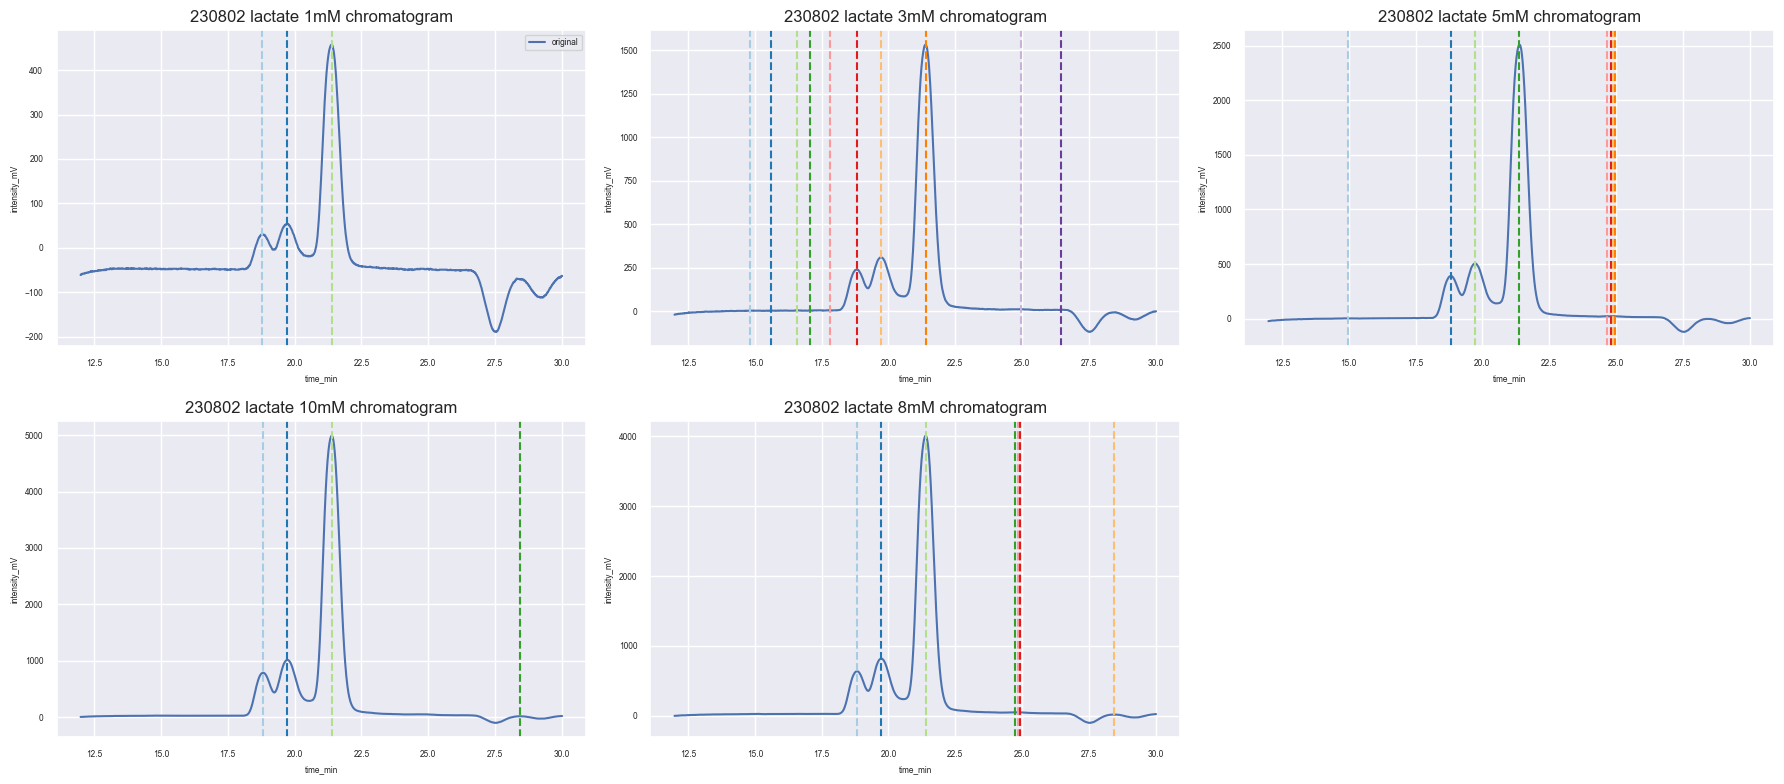

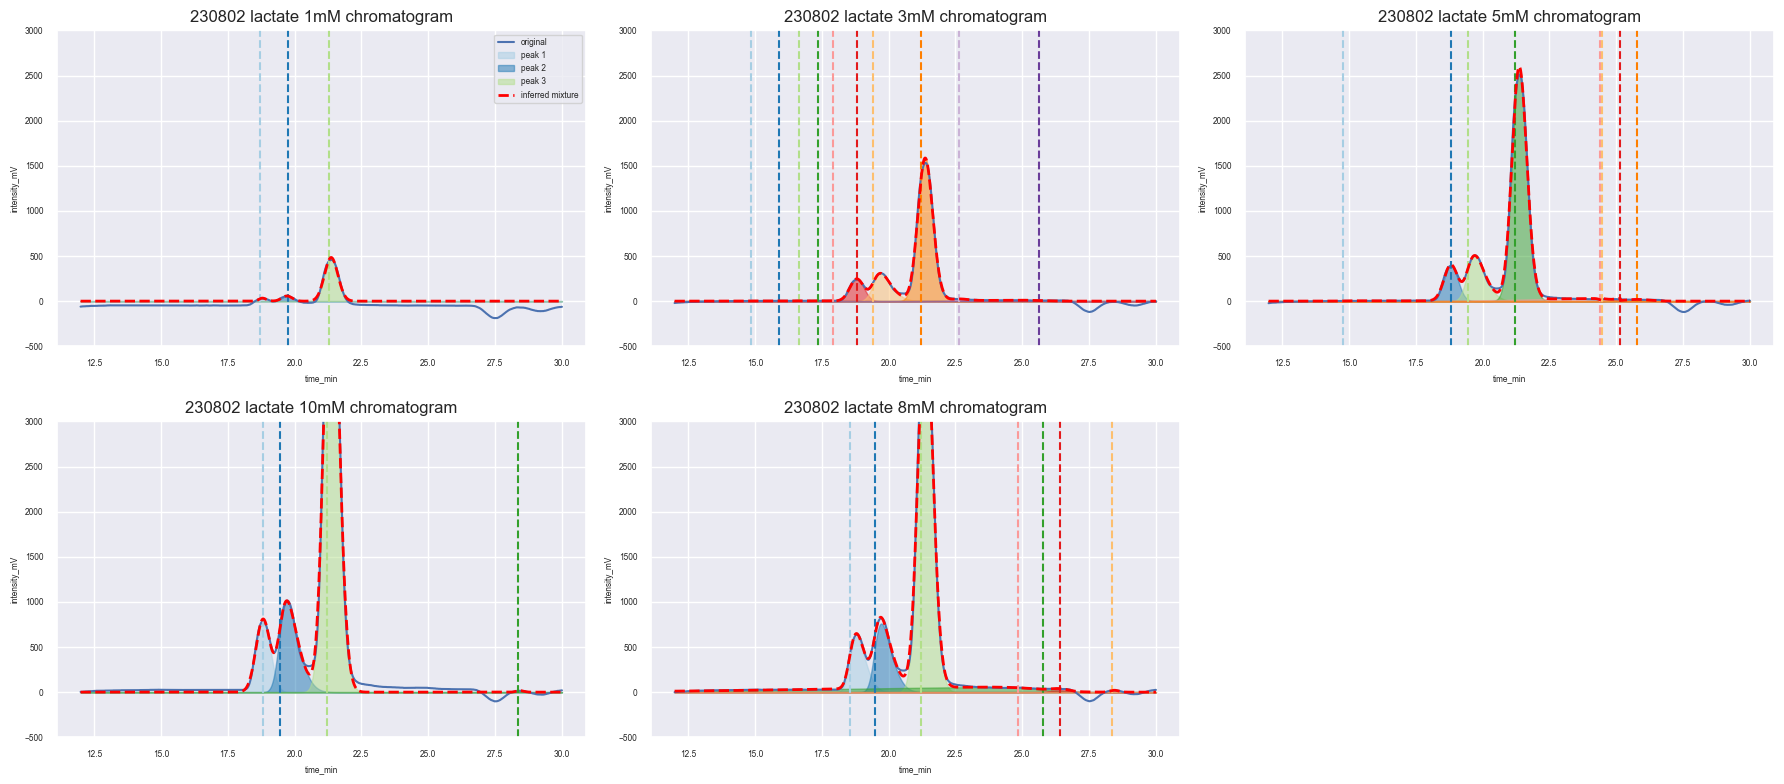

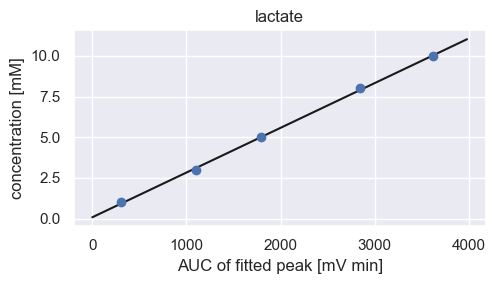

In [7]:

foldername="data_hplcrawdata/stan_water_230802_lactate_2.5mM"
filename_settings="hplc_settings_calibration.csv"
date="2307"
name_prefix="Stan_water"

substratelist=["lactate"]
timewindows=[[21,21.6]]

#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=None#[17.8,18.7,20.,21.]#[] #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(foldername,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=None,display_fullpeaklist=True,plot_time_window=analysis_window, plot_upper_limit=3000,plot_lower_limit=-500,)


Processing files...: 100%|████████████████████████| 6/6 [00:00<00:00, 72.55it/s]
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1113: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g, d in chrom_df.groupby(['sample']):
Processing files...:   0%|                                | 0/6 [00:00<?, ?it/s]/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:614: PeakPropertyWarning: some peaks have a prominence of 0
  out = scipy.signal.peak_widths(intensity, peaks,
/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:614: PeakPropertyWarning: some peaks have a widt

,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
0,12.225056,12.22500,0.135268,-0.001936,94.185004,30.491487,1,230718_glu10_mal5_scfa5_chromatogram
1,13.175984,13.34167,0.298618,1.897584,23643.228216,17697.550372,2,230718_glu10_mal5_scfa5_chromatogram
2,15.493502,15.66667,0.313047,1.714585,18515.153372,14528.706138,3,230718_glu10_mal5_scfa5_chromatogram
3,16.993270,17.00000,2.460933,-16.129670,92.000000,543.518128,4,230718_glu10_mal5_scfa5_chromatogram
4,17.389710,17.50000,0.474579,-0.003165,138.543986,164.810994,5,230718_glu10_mal5_scfa5_chromatogram
...,...,...,...,...,...,...,...,...
9,22.927279,22.93333,0.379697,-0.000147,210.278286,200.134425,10,230718_glu3_mal1_scfa1_chromatogram
10,24.450799,24.77500,0.547696,1.919704,214.939435,295.084062,11,230718_glu3_mal1_scfa1_chromatogram
11,28.520670,28.83333,0.535797,1.874463,286.857840,382.989774,12,230718_glu3_mal1_scfa1_chromatogram
12,31.161747,31.69167,0.936729,1.375685,118.029945,270.187741,13,230718_glu3_mal1_scfa1_chromatogram


******Calibration curve*****
Calibration for substrate glucose
[14.8, 15.5]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
2,15.493502,15.66667,0.313047,1.714585,18515.153372,14528.706138,3,230718_glu10_mal5_scfa5_chromatogram
2,15.490937,15.66667,0.312831,1.701911,9306.414401,7297.640628,3,230718_glu5_mal3_scfa3_chromatogram
2,15.477877,15.66667,0.321927,1.919724,1608.260688,1297.788850,3,230718_glu1_mal0.5_scfa0.5_chromatogram
2,15.495260,15.66667,0.313649,1.735153,27692.511176,21771.856505,3,230718_glu15_mal8_scfa8_chromatogram
2,15.498900,15.67500,0.315980,1.739037,36846.687465,29184.190809,3,230718_glu20_mal10_scfa10_chromatogram
2,15.490098,15.66667,0.316110,1.711952,5690.459199,4508.953769,3,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.0006856926420985734
Intercept: 0.01866786935904763
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


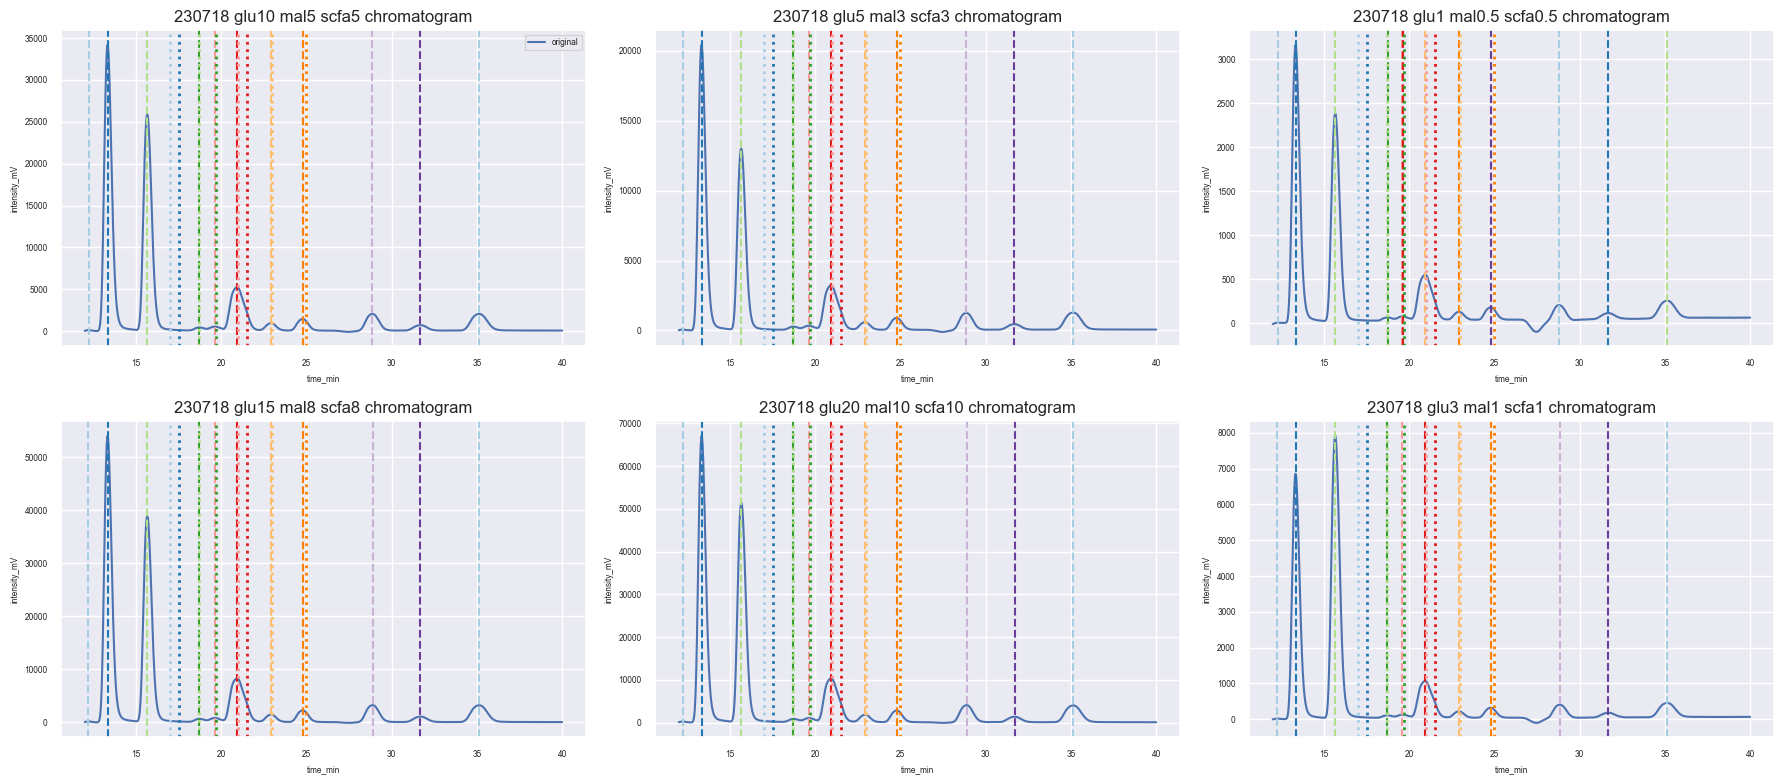

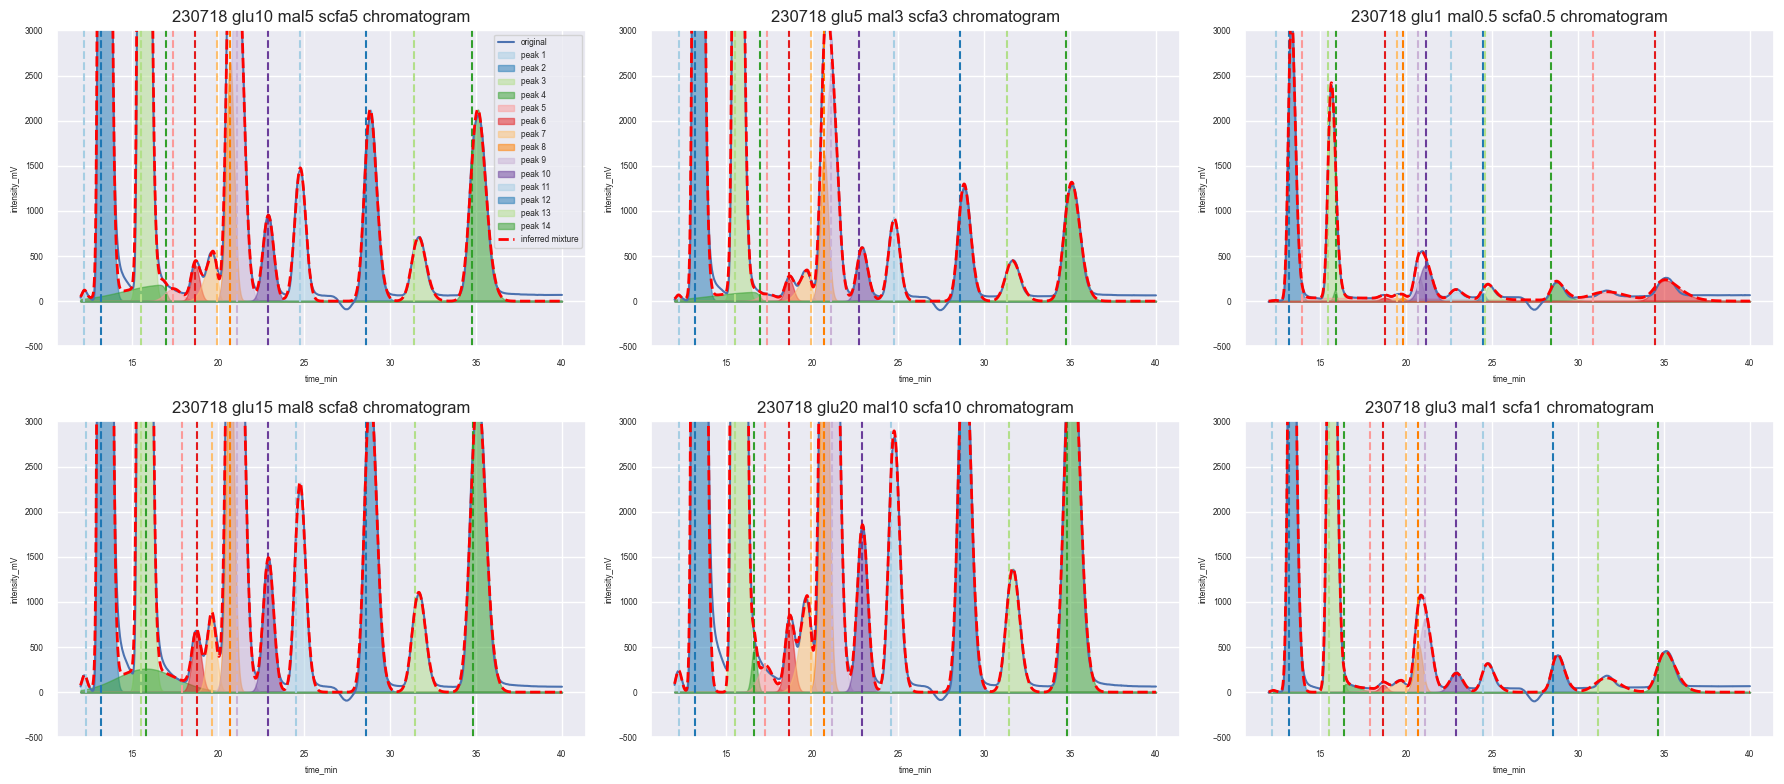

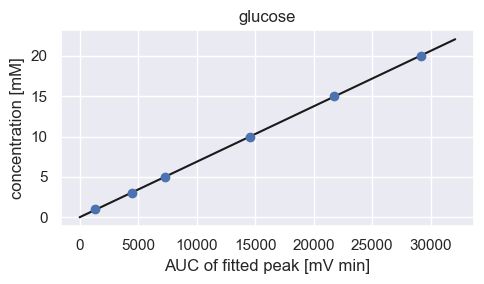

******Calibration curve*****
Calibration for substrate propionate
[27, 28.8]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
11,28.593221,28.87500,0.473582,1.367543,1594.922567,1893.324917,12,230718_glu10_mal5_scfa5_chromatogram
11,28.587929,28.85833,0.472315,1.368131,975.936390,1147.379390,12,230718_glu5_mal3_scfa3_chromatogram
13,28.437619,28.78333,0.641237,2.701937,130.777306,207.920306,14,230718_glu1_mal0.5_scfa0.5_chromatogram
11,28.608778,28.88333,0.462605,1.294843,2571.389087,2981.724599,12,230718_glu15_mal8_scfa8_chromatogram
11,28.612467,28.88333,0.460691,1.277368,3221.237280,3719.823912,12,230718_glu20_mal10_scfa10_chromatogram
11,28.520670,28.83333,0.535797,1.874463,286.857840,382.989774,12,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.0027024901932783557
Intercept: -0.07087856563682404
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


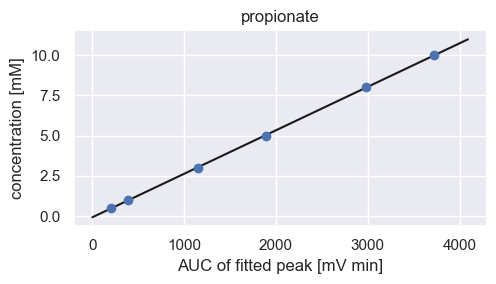

******Calibration curve*****
Calibration for substrate succinate
[20.2, 20.8]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
7,20.700516,20.93333,0.229649,-8.607757e-07,2649.870279,1525.386031,8,230718_glu10_mal5_scfa5_chromatogram
7,20.700039,20.93333,0.231206,-3.183282e-04,1621.942202,939.991914,8,230718_glu5_mal3_scfa3_chromatogram
8,20.712095,20.93333,0.235009,-1.391113e-06,277.000000,163.175341,9,230718_glu1_mal0.5_scfa0.5_chromatogram
7,20.699902,20.93333,0.225216,-1.010865e-06,4184.889206,2362.511531,8,230718_glu15_mal8_scfa8_chromatogram
7,20.710563,20.93333,0.234304,-1.066133e-06,5765.297818,3386.030968,8,230718_glu20_mal10_scfa10_chromatogram
7,20.706248,20.94167,0.239781,2.130531e-03,534.755325,321.410634,8,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.0030531362591132826
Intercept: 0.15704577472901793
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


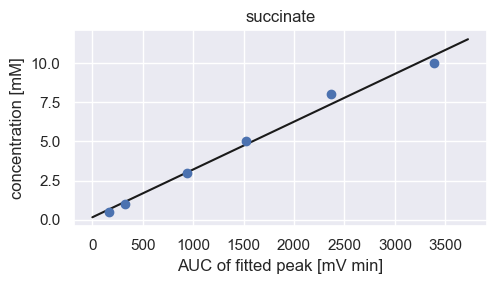

******Calibration curve*****
Calibration for substrate lactate
[20.8, 21.6]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
8,21.113994,21.5,0.361343,-0.002664,4092.979629,3707.229358,9,230718_glu10_mal5_scfa5_chromatogram
8,21.111783,21.5,0.363093,-0.001179,2508.601353,2283.174784,9,230718_glu5_mal3_scfa3_chromatogram
9,21.129900,21.5,0.360327,-0.000007,400.308753,361.561413,10,230718_glu1_mal0.5_scfa0.5_chromatogram
8,21.114162,21.5,0.359547,-0.001973,6535.849791,5890.434911,9,230718_glu15_mal8_scfa8_chromatogram
8,21.157859,21.5,0.353519,-0.069975,7808.033273,6919.018189,9,230718_glu20_mal10_scfa10_chromatogram
8,21.119799,21.5,0.372701,-0.000270,816.056308,762.378725,9,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.0014225828409589517
Intercept: -0.14054204661253333
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


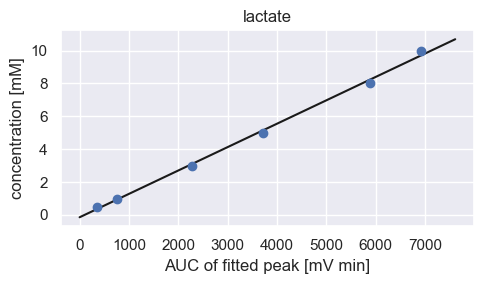

******Calibration curve*****
Calibration for substrate butyrate
[33.5, 35]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
13,34.793726,35.12500,0.581890,1.277129,1627.664071,2374.080771,14,230718_glu10_mal5_scfa5_chromatogram
13,34.774649,35.12500,0.604480,1.360274,992.153421,1503.318205,14,230718_glu5_mal3_scfa3_chromatogram
15,34.485129,35.13333,1.174706,2.517978,146.537745,426.398926,16,230718_glu1_mal0.5_scfa0.5_chromatogram
13,34.808963,35.13333,0.564318,1.223354,2593.215664,3668.197005,14,230718_glu15_mal8_scfa8_chromatogram
13,34.810388,35.13333,0.561192,1.212850,3231.015501,4545.067420,14,230718_glu20_mal10_scfa10_chromatogram
13,34.660609,35.13333,0.795003,1.990577,302.375754,602.562554,14,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.0022975948694738315
Intercept: -0.4405971355600551
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


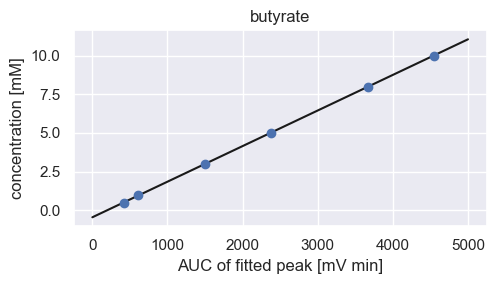

******Calibration curve*****
Calibration for substrate acetate
[23.7, 24.8]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
10,24.781257,24.78333,0.315934,-0.000057,1476.593847,1169.356330,11,230718_glu10_mal5_scfa5_chromatogram
10,24.779168,24.78333,0.320045,-0.000068,914.604138,733.725697,11,230718_glu5_mal3_scfa3_chromatogram
11,24.446427,24.77500,0.162804,0.000002,92.000000,37.544194,12,230718_glu1_mal0.5_scfa0.5_chromatogram
12,24.607890,24.80833,0.497159,3.873702,92.000000,114.649794,13,230718_glu1_mal0.5_scfa0.5_chromatogram
10,24.558216,24.78333,0.396215,1.177995,1822.790562,1810.329638,11,230718_glu15_mal8_scfa8_chromatogram
10,24.562163,24.78333,0.394014,1.168997,2275.101973,2246.995684,11,230718_glu20_mal10_scfa10_chromatogram
10,24.450799,24.77500,0.547696,1.919704,214.939435,295.084062,11,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.0044181390340690945
Intercept: -0.04429213988336578
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


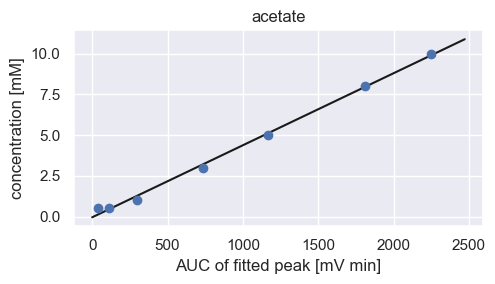

******Calibration curve*****
Calibration for substrate formate
[22, 23]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
9,22.923490,22.92500,0.311168,-0.000326,952.822543,743.185899,10,230718_glu10_mal5_scfa5_chromatogram
9,22.706927,22.91667,0.392333,1.046231,480.349122,472.391028,10,230718_glu5_mal3_scfa3_chromatogram
10,22.604983,22.93333,0.547308,2.026979,70.221536,96.336758,11,230718_glu1_mal0.5_scfa0.5_chromatogram
9,22.926543,22.93333,0.303748,0.000547,1490.235603,1134.642033,10,230718_glu15_mal8_scfa8_chromatogram
9,22.930762,22.93333,0.302621,-0.001655,1855.077587,1407.185755,10,230718_glu20_mal10_scfa10_chromatogram
9,22.927279,22.93333,0.379697,-0.000147,210.278286,200.134425,10,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.007351886467019349
Intercept: -0.3839392269413757
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


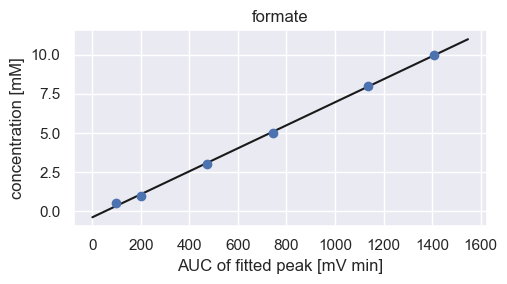

******Calibration curve*****
Calibration for substrate maltose
[12.5, 13.8]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
1,13.175984,13.34167,0.298618,1.897584,23643.228216,17697.550372,2,230718_glu10_mal5_scfa5_chromatogram
1,13.174136,13.34167,0.298743,1.886411,14141.910065,10589.989348,2,230718_glu5_mal3_scfa3_chromatogram
1,13.174238,13.34167,0.299987,1.862229,2202.936455,1656.513590,2,230718_glu1_mal0.5_scfa0.5_chromatogram
1,13.178275,13.34167,0.298463,1.913149,37265.251536,27879.432082,2,230718_glu15_mal8_scfa8_chromatogram
1,13.181607,13.34167,0.300228,1.939420,46190.331445,34761.050334,2,230718_glu20_mal10_scfa10_chromatogram
1,13.173053,13.34167,0.300854,1.892107,4750.226945,3582.280707,2,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.00028756870474974617
Intercept: -0.02576114029086085
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


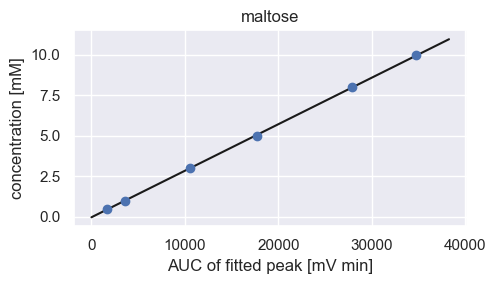

******Calibration curve*****
Calibration for substrate ethanol
[31, 33]
Peaks associated with substrate


,retention_time,retention_time_firstguess,scale,skew,amplitude,area,peak_idx,sample
12,31.376726,31.69167,0.535322,1.243624,550.388637,737.712147,13,230718_glu10_mal5_scfa5_chromatogram
12,31.335295,31.69167,0.587106,1.413539,333.150029,489.567548,13,230718_glu5_mal3_scfa3_chromatogram
12,31.424217,31.69167,0.484239,1.054808,894.295159,1084.505523,13,230718_glu15_mal8_scfa8_chromatogram
12,31.425050,31.70833,0.483543,1.076335,1103.286960,1337.252009,13,230718_glu20_mal10_scfa10_chromatogram
12,31.161747,31.69167,0.936729,1.375685,118.029945,270.187741,13,230718_glu3_mal1_scfa1_chromatogram


Slope: 0.008424947292140302
Intercept: -1.203852755208306
Calibration curve saved as: calibration.json


/Users/jonascremer/Library/CloudStorage/Dropbox/Jonas -- Markus/yield_culturing/hplc_analysis_0_1calibration/for paper/cremerlab/hplc.py:1623: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_peak.loc[:,'concentration'] = list(concs)


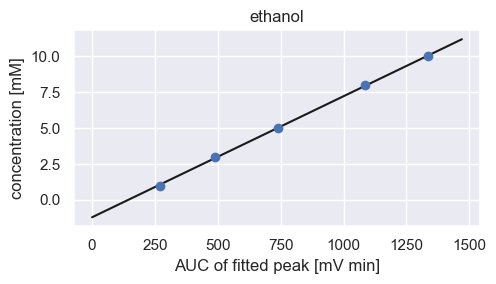

In [9]:
# calibration in water
foldername="data_hplcrawdata/Stan_calibration_water_scfa_glu_mal_2.5mM"
filename_settings="hplc_settings_calibration.csv"
date="2307"
name_prefix="Stan_water"


substratelist=["glucose","propionate","succinate","lactate","butyrate","acetate","formate","maltose","ethanol"]
timewindows=[[14.8,15.5],[27,28.8],[20.2,20.8], [20.8,21.6],[33.5,35],[23.7,24.8],[22,23],[12.5,13.8],[31,33]]

#Use the following options only when fine tuning parameters (all final parameters should be saved in settings table).
analysis_window=None #[12,20] #Sets time interval to analyze. Overwrites settings from settings table if not None.
peakpositions=None#[17.8,18.7,20.,21.]#[] #[18.7] #Sets manual peak positions. Overwrites settings from settings table if not None.
cremerlab.hplc.run_calibration(foldername,substratelist,timewindows,date=date,list_samplenames=None, name_prefix=name_prefix,filename_settings=filename_settings,output_json='calibration.json',peakpositions=peakpositions, analysis_window=analysis_window,save_full_calibrationcurve='data_calibration', AUC_treshhold=None,display_fullpeaklist=True,plot_time_window=analysis_window, plot_upper_limit=3000,plot_lower_limit=-500,)
